# Review: 0226 Zuvio

In [ ]:
n = 10
x = 0
for i in range(1, n+1):
    k = i + 1
    while k <= n:
        x = x + 1
        k += 1
print(x)

In [ ]:
n = 10
x = 0
for i in range(n):
    for k in range(i+1,n):
        x = x + 1
print(x)

In [ ]:
def test2(n):
    x = 0
    for i in range(n):
        for j in range(n):
            x = x + 1
    return x

In [ ]:
test2(3)

In [ ]:
test2(10)

In [ ]:
import matplotlib.pyplot as plt
data = [test2(n) for n in range(10)]
plt.plot(data, "o-b")
plt.xlabel("Data size(n)")
plt.ylabel("Steps")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
data = [test2(n) for n in range(10)]
data_n = [n for n in range(10)]
data_nn = [n*n for n in range(10)]
data_nnn = [n*n*n for n in range(10)]
data_2n = [n+n for n in range(10)]
plt.plot(data, "o-b", data_n, "o--g", data_nn, "o--r", data_nnn, "o--k", data_2n, "o--y")
plt.xlabel("Data size(n)")
plt.ylabel("Steps")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
f = [n**2+3*n+4 for n in range(10)]
g = [6*n+7 for n in range(10)]
plt.plot(f, "o-b", g, "o--r")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
f = [n*n**0.5 for n in range(10)]
g = [n**2 - n for n in range(10)]
plt.plot(f, "o-b", g, "o--r")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
f = [2**n-n**2 for n in range(1,20)]
g = [n**4+n**2 for n in range(1,20)]
plt.plot(f, "o-b", g, "o--r")
plt.show()

# Review: Programming Exercise 01

In [ ]:
def count_bits(n:int)->int:
    count = 0
    while n > 0:
        count += n & 1 #need fix
        n >>= 1     #need fix
    return count

In [ ]:
print(count_bits(5)) #2
print(count_bits(15)) #4
print(count_bits(0)) #0
print(count_bits(1073741824)) #1
print(count_bits(14492647)) #15

In [ ]:
def remove_element(nums:list,val:int)->int:
    for i in nums.copy() : #need fix
        if i == val:
            nums.remove(i)
    return len(nums)

In [ ]:
nums = [3,2,2,3]
print(remove_element(nums,3),nums) #2 [2, 2]
nums = [0,1,2,2,3,0,4,2]
print(remove_element(nums,2),nums) #5 [0, 1, 3, 0, 4]
nums = [3,2,2,3]
print(remove_element(nums,1),nums) #4 [3, 2, 2, 3]
nums = [3,3,3]
print(remove_element(nums,3),nums) #0 []
nums = []
print(remove_element(nums,0),nums) #0 []

In [ ]:
def get_largest_cycle(i:int, j:int)->int:
    max_cycle = -float("inf")
    for n in range( min(i,j)  , max(i,j)+1  ):  #need fix
        cycle = 1
        while n > 1:
            # 3n+1
            n = 3*n+1 if n % 2 == 1  else n // 2  # need fix if n is odd number
            cycle += 1
        max_cycle = max(max_cycle, cycle)
    return max_cycle

In [ ]:
print(get_largest_cycle(1,10)) #20
print(get_largest_cycle(100,200)) #125
print(get_largest_cycle(201,210)) #89
print(get_largest_cycle(900,1000)) #174
print(get_largest_cycle(999999,999990)) #259

# Program Analysis

## Selection Sort

o(n^2)
- outer : n 
- inner : at most  n-1 
- hence worst case : o(n^2)

In [11]:
def selection_sort(s):
    min_index = 0 
    print(f"original : {s}")
    for i in range(len(s)):   # n 
        min_index = i
        print(f"min_index : {min_index}")
        for j in range(i+1,len(s)):    # n-1 
            if s[j] < s[min_index]:
                min_index = j
                print(f"found new min_index : {min_index}")
        if min_index != i:
            s[min_index], s[i] = s[i], s[min_index]  # 交換
        print(f"Round {i+1}: {s}")  # see round 
        print("--------------------------------")
    return s

In [12]:
a = [3, 0, 1, 8, 7, 2, 5, 4, 9, 6]
print(selection_sort(a))

original : [3, 0, 1, 8, 7, 2, 5, 4, 9, 6]
min_index : 0
found new min_index : 1
Round 1: [0, 3, 1, 8, 7, 2, 5, 4, 9, 6]
--------------------------------
min_index : 1
found new min_index : 2
Round 2: [0, 1, 3, 8, 7, 2, 5, 4, 9, 6]
--------------------------------
min_index : 2
found new min_index : 5
Round 3: [0, 1, 2, 8, 7, 3, 5, 4, 9, 6]
--------------------------------
min_index : 3
found new min_index : 4
found new min_index : 5
Round 4: [0, 1, 2, 3, 7, 8, 5, 4, 9, 6]
--------------------------------
min_index : 4
found new min_index : 6
found new min_index : 7
Round 5: [0, 1, 2, 3, 4, 8, 5, 7, 9, 6]
--------------------------------
min_index : 5
found new min_index : 6
Round 6: [0, 1, 2, 3, 4, 5, 8, 7, 9, 6]
--------------------------------
min_index : 6
found new min_index : 7
found new min_index : 9
Round 7: [0, 1, 2, 3, 4, 5, 6, 7, 9, 8]
--------------------------------
min_index : 7
Round 8: [0, 1, 2, 3, 4, 5, 6, 7, 9, 8]
--------------------------------
min_index : 8
found ne

In [13]:
def selection_sort2(s): # dance version --> more direct 
    for i in range(len(s)):
        min_index = i
        for j in range(i+1,len(s)):
            if s[j] < s[min_index]:
                s[j], s[min_index] = s[min_index], s[j]
        print(f"Round {i+1}: {s}")
    return s

In [14]:
a = [3, 0, 1, 8, 7, 2, 5, 4, 9, 6]
print(selection_sort2(a))

Round 1: [0, 3, 1, 8, 7, 2, 5, 4, 9, 6]
Round 2: [0, 1, 3, 8, 7, 2, 5, 4, 9, 6]
Round 3: [0, 1, 2, 8, 7, 3, 5, 4, 9, 6]
Round 4: [0, 1, 2, 3, 8, 7, 5, 4, 9, 6]
Round 5: [0, 1, 2, 3, 4, 8, 7, 5, 9, 6]
Round 6: [0, 1, 2, 3, 4, 5, 8, 7, 9, 6]
Round 7: [0, 1, 2, 3, 4, 5, 6, 8, 9, 7]
Round 8: [0, 1, 2, 3, 4, 5, 6, 7, 9, 8]
Round 9: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Round 10: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Insertion Sort

- worst case ( reversed list ) : O(n^2)

In [14]:
def insertion_sort(s):
    for i in range(1,len(s)):   # from index 1 
        j = i
        while j > 0 and s[j] < s[j-1]:  # j > 0 確保我們不會用到負
            s[j], s[j-1] = s[j-1], s[j]  # 交換
            j = j-1  # 讓這個 inner round 可以繼續往前比較並持續交換
        print(f"Round {i}: {s}")
    return s

In [15]:
a = [29, 23, 30, 8, 4, -14, 21, 37, 34, -9]
print(insertion_sort(a))

Round 1: [23, 29, 30, 8, 4, -14, 21, 37, 34, -9]
Round 2: [23, 29, 30, 8, 4, -14, 21, 37, 34, -9]
Round 3: [8, 23, 29, 30, 4, -14, 21, 37, 34, -9]
Round 4: [4, 8, 23, 29, 30, -14, 21, 37, 34, -9]
Round 5: [-14, 4, 8, 23, 29, 30, 21, 37, 34, -9]
Round 6: [-14, 4, 8, 21, 23, 29, 30, 37, 34, -9]
Round 7: [-14, 4, 8, 21, 23, 29, 30, 37, 34, -9]
Round 8: [-14, 4, 8, 21, 23, 29, 30, 34, 37, -9]
Round 9: [-14, -9, 4, 8, 21, 23, 29, 30, 34, 37]
[-14, -9, 4, 8, 21, 23, 29, 30, 34, 37]


## Asymptotic Dominance

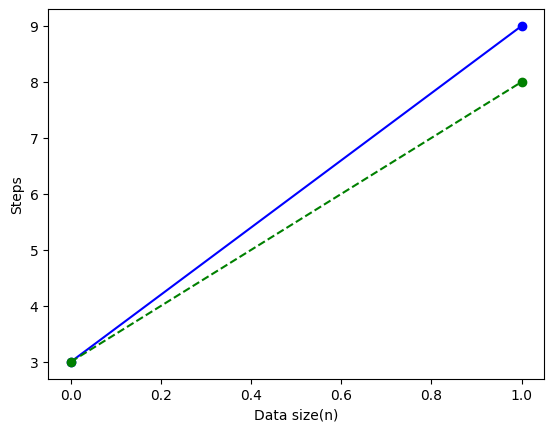

In [16]:
import math
import matplotlib.pyplot as plt 


# data_n = [n for n in range(1,10)]
# data_nlogn = [n*math.log(n,2) for n in range(1,10)]
# data_nn = [n*n for n in range(1,10)]
data_2n = [3**n for n in range(1,3)]
data_n2 = [(2**n) + n**2  for n in range(1,3)]

plt.plot(data_2n, "o-b", data_n2, "o--g")
plt.xlabel("Data size(n)")
plt.ylabel("Steps")
plt.show()

## Binary Search

In [18]:
""" 
n : the int you look for 
a : tot list 
s : start index 
e : end index 

"""

def bin_search(n:int, a:list,s:int,e:int)->int:
    if s > e:  # basically impossible --> -1 (error )
        return -1
    mid = (s + e) // 2  # start from the middle index to compare 
    print(f"a[{mid}]={a[mid]}")
    if a[mid] == n:  # usually not the case 
        return mid
    else:
        return bin_search(n, a, mid+1, e) if a[mid] < n else bin_search(n, a, s, mid-1)

In [19]:
a = [0,2,3,5,7,8,9]
print(bin_search(7, a, 0, len(a)-1))

a[3]=5
a[5]=8
a[4]=7
4


In [20]:
math.log(7,2), math.ceil(math.log(7,2))

(2.807354922057604, 3)

In [21]:
math.log(100000,2), math.ceil(math.log(100000,2))

(16.609640474436812, 17)

In [22]:
math.log(700000,2), math.ceil(math.log(700000,2)) # ceil : upper bound


(19.416995396494418, 20)

## Data Structure

### Linked List Structures(鏈接串列)
- push : insert item at the top 
- pop : remove and return the top item 
- None : remember to add when ending 

Types : 
- Contiguous : 連續形 fixed size --> 移動困難  
    - arrays 
    - matrics 
    - heaps 
    - hash 
- linked data ： non continuous --> need to set pointers to know the addess 
    - linked lists 
    - trees 
    - graph adjacent lists 

In [23]:
class ListNode:
  def __init__(self, data):
    self.data = data
    self.next = None

  def search(self, key):
    L = self
    while L and L.data != key:
      L = L.next
    return L #If key was not present in the linked list, L will have become None.
  

  def search_rec(self, key):  # recursive version of search 
    if self.data == key:
      return self
    elif self.next is None:
      return None
    else:
      return self.next.search_rec(key)

  def insert_after(self, new_node):  # 順序 matter 
    new_node.next = self.next  # new_node pointer 指向 原本的下一個node 的val 
    self.next = new_node # 原本的 pointer  指向 new_node 的 val 


# 這邊有bug 
  def delete_nextnode(self):  
    if self.next is not None: 
      # save the node 
      node_to_delete = self.next # delete next node
      self.next = self.next.next 
      node_to_delete.next = None   # delete the pointer of the node to delete 
      return True
    else: 
      return False 
    
  def delete_thisnode(self):   # assume this node is not tail 
    if self.next is None: 
      print ( 'cannot delete the tail node using this method' ) 
    else: 
      # save next node val
      next_node = self.next 
      # copy next node val to current node 
      self.data = next_node.data 
      # skip next node 
      self.next = next_node.next 
      # delete next node 
      next_node.next = None 
      return True 
      

  def print_list(self):
    L = self
    while L:
      print(L.data, end=' ')
      L = L.next
    print()

  def __iter__(self):  # same func as print_list ( mostly we use this one )
    current = self
    
    while current is not None:
      yield current	# suspend and output current ListNode object
      current = current.next

  def __str__(self):  # 使linked list 可以 print 
    return " -> ".join([L.data for L in self])

In [26]:
# practice of : while and yield 

def fibonacci():   # yield : python generator 
    a, b = 0, 1
    while True:  # 無限巡還
        yield a  # 產生當前的斐波那契數, 我們只會print 出來這個值
        a, b = b, a + b  # 更新 a 和 b 的值
        
        
fib_gen = fibonacci()

# 獲取前 10 個斐波那契數
for _ in range(13):
    print(next(fib_gen))  # 輸出 0, 1, 1, 2, 3, 5, 8, 13, 21, 34

0
1
1
2
3
5
8
13
21
34
55
89
144


### create instance

""" 
1. 節點（Node）：
鏈接串列的基本單位，每個節點包含兩個部分：
數據（Data）：存儲實際的數據。
指針（Next）：指向下一個節點的引用（或指針）。如果是最後一個節點，這個指針通常為 None。
2. 頭節點（Head）：
鏈接串列的第一個節點稱為頭節點（Head）。它是訪問整個鏈接串列的入口。如果頭節點為 None，則表示鏈接串列是空的。
3. 尾節點（Tail）：
鏈接串列的最後一個節點稱為尾節點（Tail）。尾節點的 next 指針為 None，表示鏈接串列的結束。

"""

In [48]:
presidents=['Lincoln', 'Jefferson', 'Clinton', 'Obama', 'Trump', 'Biden', 'Trump']
head = None

for i in presidents:
  if head is None:
    head = ListNode(i)
    tail = head  # 將tail 初始化為 head node 
    print(f"head : {head.data}")
    print(f"tail : {tail.data}")
  else:
    tail.next = ListNode(i)  
    # 將現在的 next pointer 指向 new node, data : i , next (pointer) : None 
    tail = tail.next   # 將 tail 更新為 「剛添加的新節點」
    print(f"tail : {tail.data}")

head : Lincoln
tail : Lincoln
tail : Jefferson
tail : Clinton
tail : Obama
tail : Trump
tail : Biden
tail : Trump


In [49]:
head.print_list()

Lincoln Jefferson Clinton Obama Trump Biden Trump 


In [50]:
print(head)  # str 表示法 

Lincoln -> Jefferson -> Clinton -> Obama -> Trump -> Biden -> Trump


In [52]:
head.search('Trump').data == tail.data    #搜尋到第一個trump 

True

In [53]:
head.search('Biden').delete_thisnode()

True

In [54]:
print(head)

Lincoln -> Jefferson -> Clinton -> Obama -> Trump -> Trump


In [56]:
head.search('Trump').data == tail.data 

True

In [57]:
head.search('Trump').delete_thisnode()

True

In [58]:
print(head)

Lincoln -> Jefferson -> Clinton -> Obama -> Trump


In [59]:
head.search('Trump').data == tail.data 

True

In [60]:
head.search('Obama').insert_after(ListNode('Biden'))

In [61]:
print(head)

Lincoln -> Jefferson -> Clinton -> Obama -> Biden -> Trump


In [62]:
head.search('Trump').delete_thisnode()

# since it's tail node, we need to update tail 

cannot delete the tail node using this method


In [63]:
print(head)

Lincoln -> Jefferson -> Clinton -> Obama -> Biden -> Trump


In [65]:
head.search('Biden').data == tail.data

False

insert

In [66]:
tail.insert_after(ListNode('XXX'))   # 插入到 tail 後面

In [67]:
print(head)

Lincoln -> Jefferson -> Clinton -> Obama -> Biden -> Trump


In [68]:
print(tail)

# tail is point to trump, and next node is XXX 

Trump -> XXX


update tail 

In [72]:
tail = tail.next 

# update tail to the next ( new added node )

In [73]:
tail.search('XXX').data  == tail.data

True

## Stacks and queues

these two data structure are only about actions ( nothing about content inside )

stacks: 
- in python : array 
- action : push / pop 
- LIFO

queues: 
- in python : linked list 
- action : increment / decrement
- FIFO 

Stack

In [21]:
# 建立一個空的堆疊
stack = []

# Push: 加入元素
stack.append(1)
stack.append(2)
stack.append(3)

print("堆疊內容:", stack)  # [1, 2, 3]

# Pop: 取出元素
top_element = stack.pop()
print("彈出的元素:", top_element)  # 3
print("彈出後的堆疊:", stack)  # [1, 2]


堆疊內容: [1, 2, 3]
彈出的元素: 3
彈出後的堆疊: [1, 2]


queues

In [74]:
from collections import deque

# init empty deque
queue = deque()  

# Enqueue: 加入元素
queue.append(1)
queue.append(2)
queue.append(3)

print("佇列內容:", queue)  # deque([1, 2, 3])

# Dequeue: 取出元素
front_element = queue.popleft()  # only difference 
print("取出的元素:", front_element)  # 1
print("取出後的佇列:", queue)  # deque([2, 3])


佇列內容: deque([1, 2, 3])
取出的元素: 1
取出後的佇列: deque([2, 3])


bi directional deque 

In [75]:
dq = deque()

dq.append(1)
dq.append(2)
dq.appendleft(3)  # 在前面加
print(dq)  # deque([3, 1, 2])

dq.pop()  # 移除最後一個元素
print(dq)  # deque([3, 1])

dq.popleft()  # 移除第一個元素
print(dq)  # deque([1])


deque([3, 1, 2])
deque([3, 1])
deque([1])


## Dictionary 

unsorted array              
- search : O(n)      
- insert : O(1), place in first empty spot 
- delete : O(1)
- min, max : O(n)
- successor, predecessor : O(n)

sorted 
- search : O(logn ) : binary search 
- insert : O(n), since it's sorted, need to move the whole thing before 
- delete : O(n) , same as above 
- min, max : O(1) , first, last 
- suc, pred : pointer + 1 , pointer -1 


